In [54]:
# ДЗ
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [55]:
import numpy as np
import cv2
import math 
import copy
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

plt.set_cmap("gray")

<Figure size 640x480 with 0 Axes>

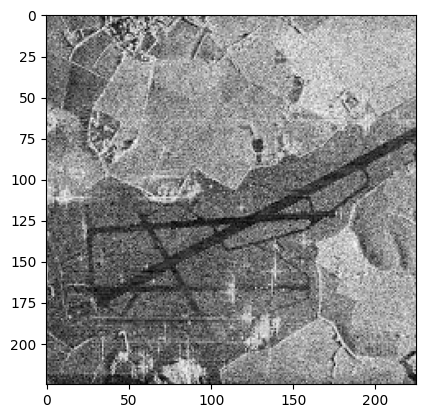

In [56]:
image = cv2.imread('./sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray) 

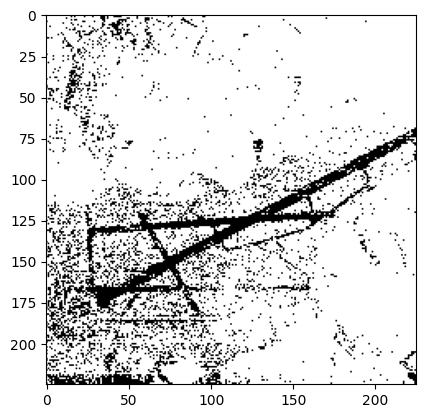

In [63]:
bin_img_1 = copy.deepcopy(image_gray)
T  = 75
bin_img_1[image_gray < T] = 0
bin_img_1[image_gray >= T] = 255
plt.imshow(bin_img_1)

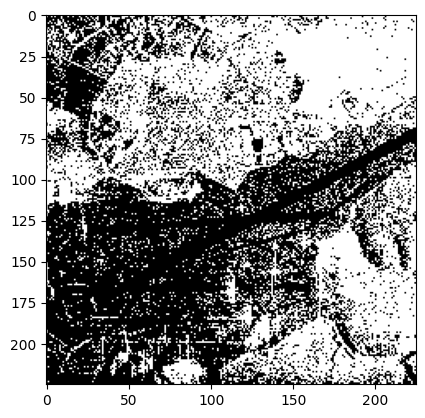

In [58]:
_, bin_img_2 = cv2.threshold(image_gray, 0, 255,
                             cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(bin_img_2)

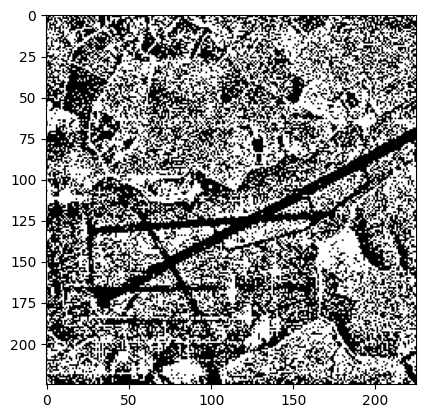

In [64]:
bin_img_3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,0)
plt.imshow(bin_img_3)

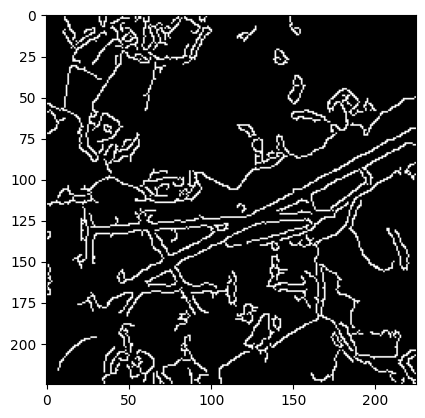

In [60]:
image_gray_denoised = cv2.GaussianBlur(image_gray, (7,7), 0)
canny = cv2.Canny(image_gray_denoised, 50, 150, apertureSize=3)
plt.imshow(canny)

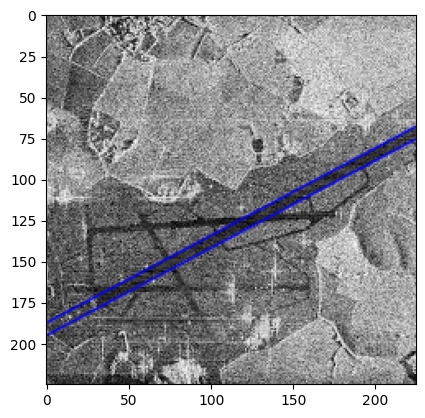

In [61]:
import math
import copy

image_copy = copy.deepcopy(image)

lines = cv2.HoughLines(canny, 1, np.pi / 180, 100)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(image_copy, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)

plt.imshow(image_copy)